## Tests for *intertrain* module

> Fast multidimensional function interpolation by Chebyshev polynomials in the dense (numpy) or sparse (tensor train (TT) with cross approximation) format using Fast Fourier Transform (FFT).

In [1]:
import sys
import time

import numpy as np
from scipy.linalg import expm as expm
import matplotlib as mpl
import matplotlib.pyplot as plt

import tt

sys.path.append('./../lib')
from intertrain import Intertrain

---
---

### Construction of Chebyshev grid

---

#### Full Chebyshev grid

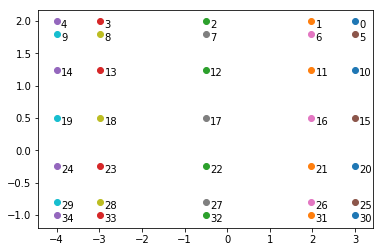

In [2]:
IT = Intertrain(n=[5, 7], l=[[-4., 3.], [-1., 2.]])

X = IT.grid()

for k in range(X.shape[1]):
    x = X[:, k]
    plt.scatter(x[0], x[1])
    plt.text(x[0]+0.1, x[1]-0.1, '%d'%k)
plt.show()

---

#### List of Chebyshev grid points

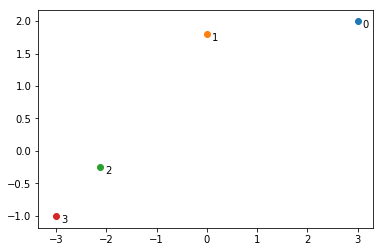

In [3]:
IT = Intertrain(n=[5, 7], l=[[-3., 3.], [-1., 2.]])

X = IT.pois([
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

for k in range(X.shape[1]):
    x = X[:, k]
    plt.scatter(x[0], x[1])
    plt.text(x[0]+0.1, x[1]-0.1, '%d'%k)
plt.show()

---
---

### Construction of Chebyshev polynomials

---

#### Chebyshev polynomials on the single point

In [4]:
T = Intertrain.polynomials(X=0.5, m=4)
print(T.shape, T)

(5,) [ 1.   0.5 -0.5 -1.  -0.5]


---

#### Chebyshev polynomials on the single point with custom limits

In [5]:
T = Intertrain.polynomials(X=-3., m=4, l=[[-3., 3.]]) # -3 maps to -1
print(T)

[ 1. -1.  1. -1.  1.]


---

#### Chebyshev polynomials on the simple mesh

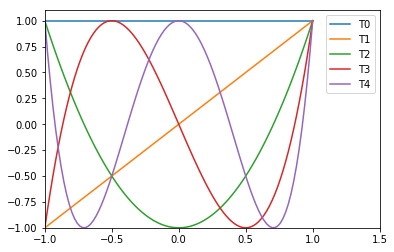

In [6]:
m = 5
X = np.linspace(-1., 1., 100)
T = Intertrain.polynomials(X, m)

for i in range(m):
    plt.plot(X, T[i, :], label='T%d'%i)
    
plt.xlim(-1., 1.5)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

---

#### Chebyshev polynomials on the simple mesh with custom limits

> The corresponding x values will be scaled from the given limits to the standard interval [-1, 1].

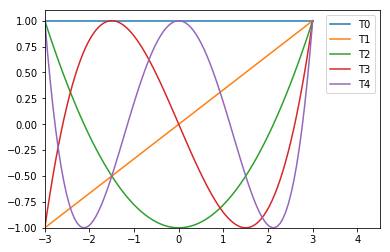

In [7]:
m = 5
X = np.linspace(-3., 3., 100)
T = Intertrain.polynomials(X, m, [[-3., 3.]])

for i in range(m):
    plt.plot(X, T[i, :], label='T%d'%i)
    
plt.xlim(-3., 4.5)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

---

#### Chebyshev polynomials on the multidimensional mesh

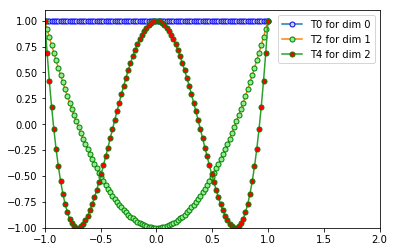

In [8]:
m = 5
X = np.linspace(-1., 1., 100)
X = np.vstack([X, X, X])
T = Intertrain.polynomials(X, m)

plt.plot(
    X[0, :], T[0, 0, :], label='T0 for dim 0',
    marker='o', markersize=5, markerfacecolor='lightgrey', markeredgecolor='b'
)
plt.plot(
    X[1, :], T[2, 1, :], label='T2 for dim 1',
    marker='o', markersize=5, markerfacecolor='lightgreen', markeredgecolor='g'
)
plt.plot(
    X[2, :], T[4, 2, :], label='T4 for dim 2',
    marker='o', markersize=5, markerfacecolor='red', markeredgecolor='g'
)
    
plt.xlim(-1., 2.0)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

---

#### Chebyshev polynomials on the multidimensional mesh with custom limits

> The corresponding x values will be scaled from given limits to standard interval [-1, 1].

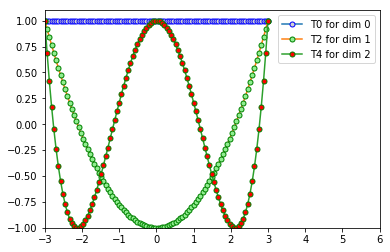

In [9]:
m = 5
X = np.linspace(-3., 3., 100)
X = np.vstack([X, X, X])
T = Intertrain.polynomials(X, m, [[-3., 3.]])

plt.plot(
    X[0, :], T[0, 0, :], label='T0 for dim 0',
    marker='o', markersize=5, markerfacecolor='lightgrey', markeredgecolor='b'
)
plt.plot(
    X[1, :], T[2, 1, :], label='T2 for dim 1',
    marker='o', markersize=5, markerfacecolor='lightgreen', markeredgecolor='g'
)
plt.plot(
    X[2, :], T[4, 2, :], label='T4 for dim 2',
    marker='o', markersize=5, markerfacecolor='red', markeredgecolor='g'
)
    
plt.xlim(-3., 6.0)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

---
---

### Direct construction of 1D Chebyshev interpolation

---

#### Direct construction of 1D Chebyshev interpolation for one function

Max relative error for interpolation nodes : 1.33e-15
Max relative error for random nodes        : 8.36e-16


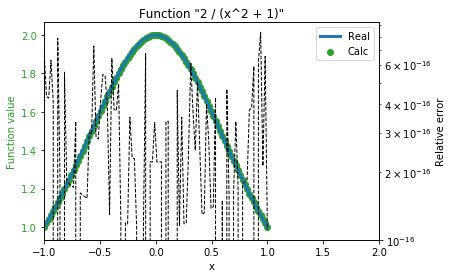

In [10]:
def func_f(x):
    return 2. / (x**2 + 1)

n = 200
N = n - 1
j = np.arange(n)
x = np.cos(np.pi * j / N)
u = func_f(x)
a = Intertrain.interpolate(u)

u = u.reshape(-1, 1)
v = Intertrain.polynomials(x, N).T@a
e = np.abs((v - u) / u)
print('Max relative error for interpolation nodes : %-8.2e'%np.max(e))

x = np.linspace(-1., 1., 100)
u = func_f(x).reshape(-1, 1)
v = Intertrain.polynomials(x, N).T@a
e = np.abs((v - u) / u)
print('Max relative error for random nodes        : %-8.2e'%np.max(e))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Function "2 / (x^2 + 1)"')
ax1.set_xlabel('x')
ax1.set_xlim(-1, 2)

ax1.set_ylabel('Function value', color='tab:green')
ax1.plot(x, u, color='tab:blue', linewidth=3, label='Real')
ax1.scatter(x, v, color='tab:green', label='Calc')
ax1.tick_params(axis='y', which='both', labelcolor='tab:green')
ax1.legend(loc='best')

ax2.set_ylabel('Relative error', color='black')
ax2.plot(x, e, '--', linewidth=1, color='black')
ax2.tick_params(axis='y', which='both', labelcolor='black')
ax2.semilogy()

plt.show()

---

#### Direct construction of 1D Chebyshev interpolation for several functions

Max relative error for random nodes : 8.36e-16 | Func: 2 / (x^2 + 1)
Max relative error for random nodes : 8.72e-16 | Func: e^{x^2/4}
Max relative error for random nodes : 1.40e-15 | Func: sin(\pi * x^2) + 2 / (x + 2)
Max relative error for random nodes : 9.14e-14 | Func: cos(\pi * x^3) - 2 / x^2


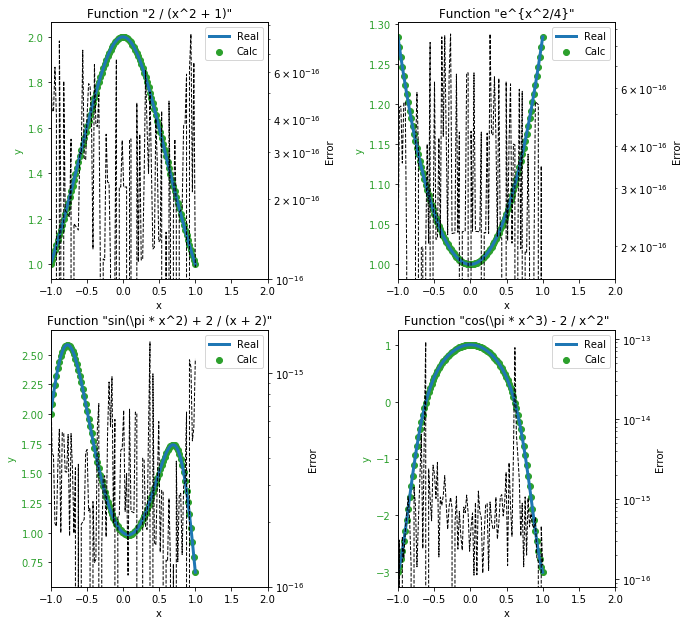

In [11]:
def func_f1(x): return 2. / (x**2 + 1)
def func_f2(x): return np.exp(x**2 / 4.)
def func_f3(x): return np.sin(np.pi * x**2) + 2. / (x + 2.)
def func_f4(x): return np.cos(np.pi * x**3) - 2. * x**2

funcs = [
    '2 / (x^2 + 1)',
    'e^{x^2/4}',
    'sin(\pi * x^2) + 2 / (x + 2)',
    'cos(\pi * x^3) - 2 / x^2',
]

n = 200
N = n - 1
j = np.arange(n)
x = np.cos(np.pi * j / N)
u1 = func_f1(x).reshape(-1, 1)
u2 = func_f2(x).reshape(-1, 1)
u3 = func_f3(x).reshape(-1, 1)
u4 = func_f4(x).reshape(-1, 1)
a = Intertrain.interpolate(np.hstack([u1, u2, u3, u4]))

fig = plt.figure(figsize=(8, 8))
gs = mpl.gridspec.GridSpec(
    ncols=2, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.6, hspace=0.2, width_ratios=[1, 1], height_ratios=[1, 1]
)

x = np.linspace(-1., 1., 100)

for k in range(len(funcs)):
    i = int(k / 2)
    j = k - 2*i
    
    u = eval('func_f%d'%(k+1))(x)
    v = Intertrain.polynomials(x, N).T@a[:, k]
    e = np.abs((v - u) / u)
    
    print('Max relative error for random nodes : %-8.2e | Func: %s'%(np.max(e), funcs[k]))

    ax1 = fig.add_subplot(gs[i, j])
    ax2 = ax1.twinx()
    
    ax1.set_title('Function "%s"'%funcs[k])
    ax1.set_xlabel('x')
    ax1.set_xlim(-1, 2)

    ax1.set_ylabel('y', color='tab:green')
    ax1.plot(x, u, color='tab:blue', linewidth=3, label='Real')
    ax1.scatter(x, v, color='tab:green', label='Calc')
    ax1.tick_params(axis='y', which='both', labelcolor='tab:green')
    ax1.legend(loc='best')

    ax2.set_ylabel('Error', color='black')
    ax2.plot(x, e, '--', linewidth=1, color='black')
    ax2.tick_params(axis='y', which='both', labelcolor='black')
    ax2.semilogy()

plt.show()

---

#### Complexity estimation of 1D Chebyshev interpolation for several functions

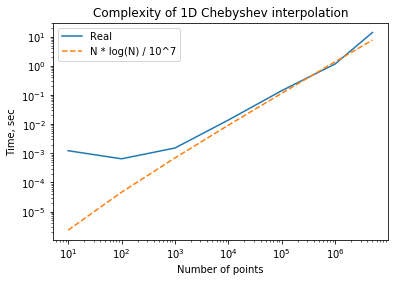

In [12]:
def func_f(x):
    return np.exp(x**2 / 4.)

k = 10
N = np.array([1E1, 1E2, 1E3, 1E4, 1E5, 1E6, 5E6])
T = np.array([])

for n in N:
    j = np.arange(n)
    x = np.cos(np.pi * j / (n-1))
    u = func_f(x).reshape(-1, 1)
    t = time.time()
    a = Intertrain.interpolate(np.repeat(u, k, axis=1))
    T = np.append(T, [time.time()-t])

C = N * np.log(N)/1.0E7

plt.plot(N, T, label='Real')
plt.plot(N, C, '--', label='N * log(N) / 10^7')
plt.title('Complexity of 1D Chebyshev interpolation')
plt.xlabel('Number of points')
plt.ylabel('Time, sec')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best')
plt.show()

---
---

### Chebyshev differentiation matrices

---

#### Check for the matrix items

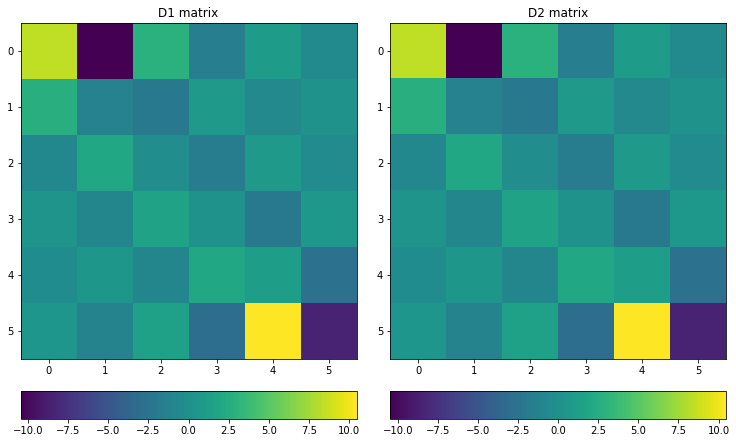

Error for D1 D1 = D2                       : 1.42e-14
Error for D1[0, 0] = (2N^2+1)/6            : 1.78e-15
Error for D1[0, 2] = + 2 / (1-x2)          : 0.00e+00
Error for D1[0, 3] = - 2 / (1-x3)          : 2.22e-16
Error for D1[4, 4] = - x[4] / 2 / (1-x4^2) : 6.66e-16


In [13]:
n = np.array([6]) 
l = np.array([[-1., 1.]])
N = n[0] - 1
IT = Intertrain(n, l)
D1 = IT.dif1()
D2 = IT.dif2()

fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(
    ncols=2, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.1, hspace=0.02, width_ratios=[1, 1], height_ratios=[14, 1]
)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('D1 matrix')
im = ax.imshow(D1)
ax = fig.add_subplot(gs[1, 0])
cb = plt.colorbar(im, cax=ax, orientation='horizontal')

ax = fig.add_subplot(gs[0, 1])
ax.set_title('D2 matrix')
im = ax.imshow(D1)
ax = fig.add_subplot(gs[1, 1])
cb = plt.colorbar(im, cax=ax, orientation='horizontal')

plt.show()

x = IT.grid()[0, :]

e = np.max(np.abs(D1@D1 - D2))
print('Error for D1 D1 = D2                       : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 0] - (2.*N**2+1.) / 6.
print('Error for D1[0, 0] = (2N^2+1)/6            : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 2] - 2. / (1. - x[2])
print('Error for D1[0, 2] = + 2 / (1-x2)          : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 3] + 2. / (1. - x[3])
print('Error for D1[0, 3] = - 2 / (1-x3)          : %-8.2e'%np.max(np.abs(e)))

e = D1[4, 4] + x[4] / (1. - x[4]**2) / 2.
print('Error for D1[4, 4] = - x[4] / 2 / (1-x4^2) : %-8.2e'%np.max(np.abs(e)))

---
---

### 1D PDE solution by Chebyshev differentiation matrix

Let consider a model PDE

$$
\Delta u(x) = f(x),
\quad
x \in [0, 1],
\quad
u(0) = 0,
\quad
u(1) = 0,
\quad
f(x) = -\pi^2 \sin{(\pi x)},
$$
with known exact solution
$$
u(x) = \sin{(\pi x)}.
$$

We can solve it on the Chebyshev grid using 2th order Chebyshev differentiation matrix from the system
$$
D u = f,
$$
excluding boundary points.

---

#### Direct solution

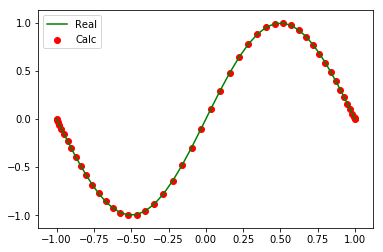

Number of spatial points :       50
Error                    : 1.57e-14    


In [14]:
def func_u(x):
    return np.sin(np.pi*x)

def func_f(x):
    return -1. * np.pi * np.pi * np.sin(np.pi*x)

IT = Intertrain(n=[50], l=[[-1., 1.]])

X = IT.grid()
I = np.eye(IT.n[0])
J = np.eye(IT.n[0])
J[0, 0] = 0.
J[-1, -1] = 0.
D = J @ IT.dif2() + I - J
f = J @ (func_f(X).reshape(-1, 1))

u_calc = np.linalg.solve(D, f).reshape(-1)
u_real = func_u(X).reshape(-1)
e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)
x = X.reshape(-1)

plt.plot(x, u_real, c='g', label='Real')
plt.scatter(x, u_calc, c='r', label='Calc')
plt.legend(loc='best')
plt.show()

print('Number of spatial points : %8d'%IT.n[0])
print('Error                    : %-12.2e'%e)

---

#### Time and convergence rates

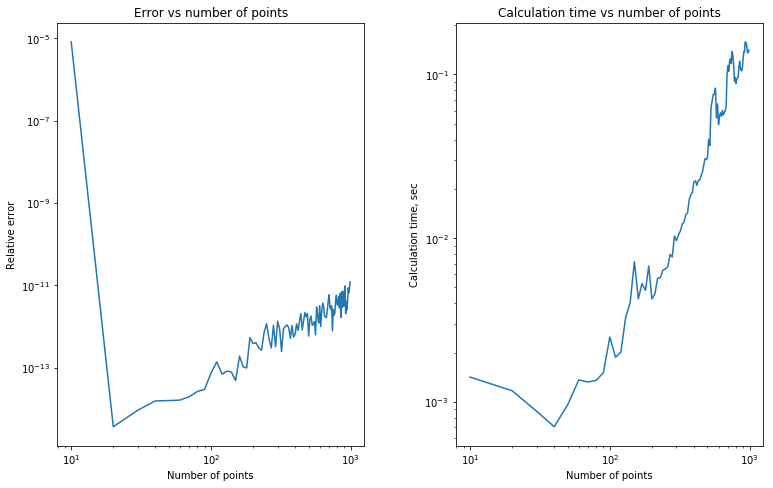

In [15]:
N = np.arange(10, 1000, 10)
T = []
E = []

for n in N:
    t = time.time()
    
    IT = Intertrain(n=[n], l=[[-1., 1.]])

    X = IT.grid()
    I = np.eye(IT.n[0])
    J = np.eye(IT.n[0])
    J[0, 0] = 0.
    J[-1, -1] = 0.
    D = J @ IT.dif2() + I - J
    f = J @ (func_f(X).reshape(-1, 1))

    u_calc = np.linalg.solve(D, f).reshape(-1)
    u_real = func_u(X).reshape(-1)
    e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)

    E.append(e) 
    T.append(time.time() - t)
    

fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(N, E)
ax.set_title('Error vs number of points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(N, T)
ax.set_title('Calculation time vs number of points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
ax.semilogx()
ax.semilogy()

plt.show()

---
---

### 1D time dependent PDE solution by Chebyshev differentiation matrix

Let consider a model PDE

$$
\frac{\partial \, u}{\partial \, t} = \Delta u(x)
\quad
x \in [0, 1],
\quad
u(0) = 0,
\quad
u(1) = 0,
\quad
u(x, 0) = \sin{(\pi x)},
$$
with known exact solution
$$
u(x, t) = \sin{(\pi x)} e^{-\pi^2t}.
$$

We can solve it for the time $t$ using uniform time grid with step $h$ and iterations
$$
u_{k+1}(x) = e^{h \cdot D_2} u_{k}(x),
\quad
k = 0, 1, \ldots, \frac{t}{h} - 1.
$$
where $u_{0}(x)$ is known initial condition.

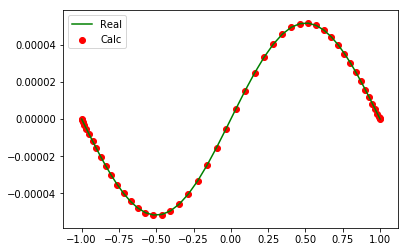

Number of time points    :    10000
Number of spatial points :       50
Error                    : 1.13e-09    


In [16]:
# Equation parameters

def func_u(x, t):
    return np.sin(np.pi*x) * np.exp(-1. * np.pi**2 * t)

def func_u0(x):
    return func_u(x, 0)

# Time grid

t_min = 0.
t_max = 1.
t_poi = 10000

m = t_poi
h = (t_max - t_min) / (t_poi - 1)

T = np.linspace(t_min, t_max, t_poi)

# Spatial grid and Cheb. dif. matrix

n = 50

IT = Intertrain(n=[n], l=[[-1., 1.]])
X = IT.grid()
D = IT.dif2()

# Solution

J = np.eye(n)
J[0, 0] = 0.
J[-1, -1] = 0.

Z = expm(h * J @ D) @ J

u = func_u0(X).reshape(-1)
for t in T[:-1]:
    u = Z@u

# Check result
    
t = t_max
x = X.reshape(-1)
v = func_u(X, t).reshape(-1)
e = np.linalg.norm(v - u) / np.linalg.norm(v)

# Output result

plt.plot(x, v, c='g', label='Real')
plt.scatter(x, u, c='r', label='Calc')
plt.legend(loc='best')
plt.show()


print('Number of time points    : %8d'%t_poi)
print('Number of spatial points : %8d'%IT.n[0])
print('Error                    : %-12.2e'%e)

---

#### Time and convergence rates vs number of spatial points

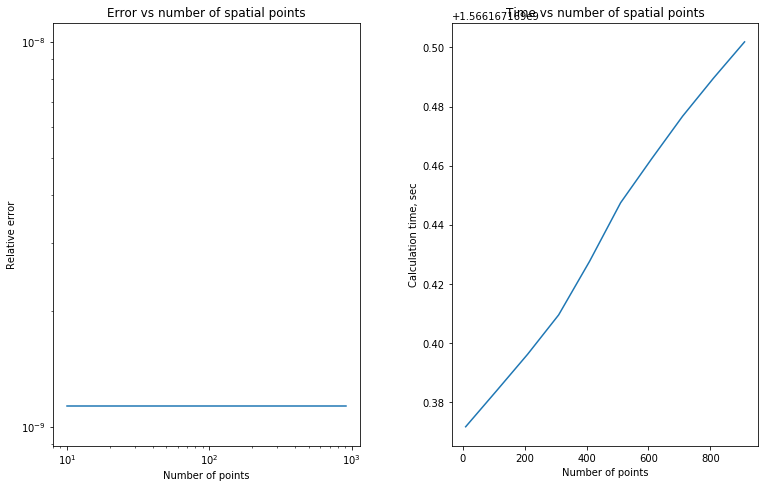

In [17]:
m = 10000
N = np.arange(10, 1000, 100)
Ts = []
Es = []

for n in N:
    t = time.time()

    t_min = 0.
    t_max = 1.
    t_poi = m

    h = (t_max - t_min) / (t_poi - 1)

    T = np.linspace(t_min, t_max, t_poi)

    n = 50

    IT = Intertrain(n=[n], l=[[-1., 1.]])
    X = IT.grid()
    D = IT.dif2()

    J = np.eye(n)
    J[0, 0] = 0.
    J[-1, -1] = 0.

    Z = expm(h * J @ D) @ J

    u = func_u0(X).reshape(-1)
    for t in T[:-1]:
        u = Z@u

    t = t_max
    x = X.reshape(-1)
    v = func_u(X, t).reshape(-1)
    e = np.linalg.norm(v - u) / np.linalg.norm(v)

    Es.append(e)
    Ts.append(time.time() - t)
    
fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(N, Es)
ax.set_title('Error vs number of spatial points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(N, Ts)
ax.set_title('Time vs number of spatial points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
#ax.semilogx()
#ax.semilogy()

plt.show()

---

#### Time and convergence rates vs number of time points

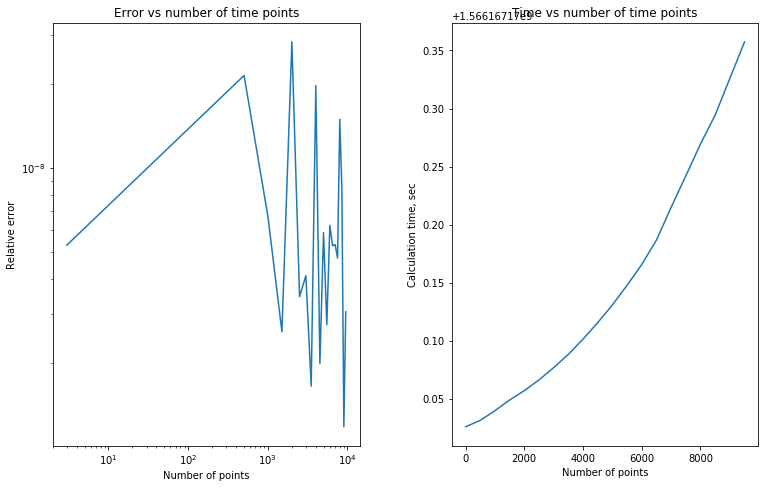

In [18]:
n = 100
M = np.arange(3, 10000, 500)
Ts = []
Es = []

for m in M:
    t = time.time()

    t_min = 0.
    t_max = 1.
    t_poi = m

    h = (t_max - t_min) / (t_poi - 1)

    T = np.linspace(t_min, t_max, t_poi)

    IT = Intertrain(n=[n], l=[[-1., 1.]])
    X = IT.grid()
    D = IT.dif2()

    J = np.eye(n)
    J[0, 0] = 0.
    J[-1, -1] = 0.

    Z = expm(h * J @ D) @ J

    u = func_u0(X).reshape(-1)
    for t in T[:-1]:
        u = Z@u

    t = t_max
    x = X.reshape(-1)
    v = func_u(X, t).reshape(-1)
    e = np.linalg.norm(v - u) / np.linalg.norm(v)

    Es.append(e)
    Ts.append(time.time() - t)

    
fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(M, Es)
ax.set_title('Error vs number of time points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(M, Ts)
ax.set_title('Time vs number of time points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
#ax.semilogx()
#ax.semilogy()

plt.show()

---
---

### 2D PDE solution by Chebyshev differentiation matrix

**TODO!**

---
---

### 2D time dependent PDE solution by Chebyshev differentiation matrix

**TODO!**

---
---

### Test for the cross approximation in the TT-format

In [19]:
def f(x):
    return 1. + x[0, ] ** 1 + x[1, ] ** 2 + x[2, ] ** 3

def f_pois(i):
    return i

n = [5, 6, 7]
eps = 1.E-6
opts = {
    'nswp': 2,
}

Y, crs_res = Intertrain.cross(f, f_pois, n, eps, opts, './../tmp/tmp.txt')
Y = Y.full()

I = np.array([
    [1, 2, 3, 4],
    [2, 1, 0, 3],
    [3, 2, 1, 0]
])
y_real = f(f_pois(I))
y_calc = np.array([Y[tuple(I[:, k])] for k in range(I.shape[1])])
err = np.abs((y_real - y_calc) / y_real)

print('Result: ', crs_res)
print('Errors: ', ', '.join(['%8.2e'%e for e in err]))

Result:  {'evals': 384, 't_func': 7.400910059611002e-07, 'iters': 2, 'err_rel': 2.3e-15, 'err_abs': 3.6e-12, 'erank': 5.0}
Errors:  0.00e+00, 2.96e-16, 0.00e+00, 2.54e-16


---
---

### Interpolation of N-dim functions by Chebyshev polynomials

---

#### Helper functions

In [20]:
def int_check(N_tt, N_np, d, l, func):
    T_init_tt = []
    T_prep_tt = []
    T_calc_tt = []
    E_tt = []
    N_f_tt = []
    N_a_tt = []
    T_init_np = []
    T_prep_np = []
    T_calc_np = []
    E_np = []
    N_f_np = []
    N_a_np = []
    
    for n in N_tt:
        IT = Intertrain([n]*d, l, eps=1.E-6, log_path='./../tmp/tmp.txt')
        IT.init(func)
        IT.prep()
        IT.test()
        T_init_tt.append(IT._t_init)
        T_prep_tt.append(IT._t_prep)
        T_calc_tt.append(IT._t_calc)
        E_tt.append(np.mean(IT.err))
        N_f_tt.append(np.mean(IT.crs_res['evals']))
        N_a_tt.append(sum([G.size for G in tt.tensor.to_list(IT.A)]))
        
    for n in N_np:
        IT = Intertrain([n]*d, l, eps=1.E-6, with_tt=False, log_path='./../tmp/tmp.txt')
        IT.init(func)
        IT.prep()
        IT.test()
        T_init_np.append(IT._t_init)
        T_prep_np.append(IT._t_prep)
        T_calc_np.append(IT._t_calc)
        E_np.append(np.mean(IT.err))
        N_f_np.append(np.prod(IT.n))
        N_a_np.append(np.prod(IT.n))
    
    fig = plt.figure(figsize=(14, 10))
    gs = mpl.gridspec.GridSpec(
        ncols=3, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
        wspace=0.3, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1]
    )

    ax = fig.add_subplot(gs[0, 0])
    ax.set_title('Data collection time (%dD)'%d)
    ax.plot(N_tt, T_init_tt, label='TT')
    ax.plot(N_np, T_init_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
    
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title('Interpolation time (%dD)'%d)
    ax.plot(N_tt, T_prep_tt, label='TT')
    ax.plot(N_np, T_prep_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
    
    ax = fig.add_subplot(gs[0, 2])
    ax.set_title('Evaluation time (%dD)'%d)
    ax.plot(N_tt, T_calc_tt, label='TT')
    ax.plot(N_np, T_calc_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
    
    ax = fig.add_subplot(gs[1, 0])
    ax.set_title('Interpolation error (%dD)'%d)
    ax.plot(N_tt, E_tt, label='TT')
    ax.plot(N_np, E_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
 
    ax = fig.add_subplot(gs[1, 1])
    ax.set_title('Number of evaluations (%dD)'%d)
    ax.plot(N_tt, N_f_tt, label='TT')
    ax.plot(N_np, N_f_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
    
    ax = fig.add_subplot(gs[1, 2])
    ax.set_title('Size of A tensor (%dD)'%d)
    ax.plot(N_tt, N_a_tt, label='TT')
    ax.plot(N_np, N_a_np, label='NP')
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc='best')
        
    plt.show()

---

#### Interpolation of 1D function by Chebyshev polynomials

Let consider 1D function of the form
$$
f(x) = 2 \sin{\left( \pi x \right)}.
$$

In [21]:
def func(x):
    return 2. * np.sin(np.pi * x) + np.exp(-x[0, ])

d = 1
n = [50]
l = [[-3., 4.]]

In [22]:
IT = Intertrain(n, l, with_tt=False, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 1D, NP
Dim 1            : Poi 50  | Min -3.000 | Max 4.000  |
------------------ Time
Init             : 2.44e-04 sec. 
Prep             : 7.02e-02 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 4.80e-06 sec. 
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 3.40e-13 
Error (mean)     : 6.82e-15 
Error (min)      : 0.00e+00 
------------------


In [23]:
IT = Intertrain(n, l, eps=1.E-6, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 1D, TT, eps= 1.00e-06
Dim 1            : Poi 50  | Min -3.000 | Max 4.000  |
------------------ Time
Init             : 1.67e-02 sec. 
Prep             : 1.76e-03 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 6.90e-07 sec. 
------------------ Cross appr. parameters
nswp             :      200
kickrank         :        1
rf               : 2.00e+00
------------------ Cross appr. result
Func. evaluations:      200
Cross iterations :        2
Av. tt-rank      : 0.00e+00
Cross err (rel)  : 0.00e+00
Cross err (abs)  : 0.00e+00
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 1.59e-13 
Error (mean)     : 4.38e-15 
Error (min)      : 0.00e+00 
------------------


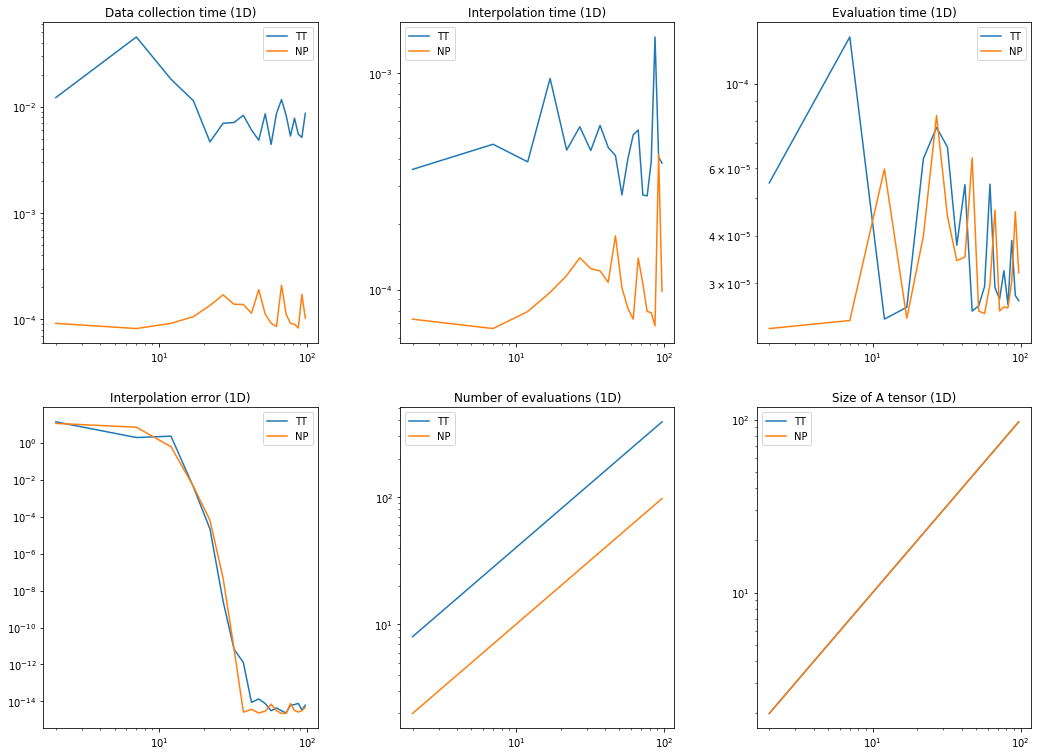

In [24]:
N_tt = np.arange(2, 100, 5)
N_np = np.arange(2, 100, 5)
int_check(N_tt, N_np, d, l, func)

---

#### Interpolation of 2D function by Chebyshev polynomials

Let consider 2D function of the form
$$
f(x) = 2 \sin{\left( \pi x_1 \right)} + e^{-x_2}.
$$

In [25]:
def func(x):
    return 2. * np.sin(np.pi * x[0, ]) + np.exp(-x[1, ])

d = 2
n = [20, 24]
l = [[-3., 4.], [-2., 3.]]

In [26]:
IT = Intertrain(n, l, with_tt=False, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 2D, NP
Dim 1            : Poi 20  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 24  | Min -2.000 | Max 3.000  |
------------------ Time
Init             : 8.36e-04 sec. 
Prep             : 2.09e-03 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 1.74e-06 sec. 
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 2.61e-02 
Error (mean)     : 4.99e-04 
Error (min)      : 1.51e-06 
------------------


In [27]:
IT = Intertrain(n, l, eps=1.E-6, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 2D, TT, eps= 1.00e-06
Dim 1            : Poi 20  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 24  | Min -2.000 | Max 3.000  |
------------------ Time
Init             : 1.96e-02 sec. 
Prep             : 6.27e-04 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 2.53e-07 sec. 
------------------ Cross appr. parameters
nswp             :      200
kickrank         :        1
rf               : 2.00e+00
------------------ Cross appr. result
Func. evaluations:     1056
Cross iterations :        3
Av. tt-rank      : 7.00e+00
Cross err (rel)  : 4.30e-16
Cross err (abs)  : 3.10e-14
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 1.35e-02 
Error (mean)     : 3.98e-04 
Error (min)      : 5.66e-06 
------------------


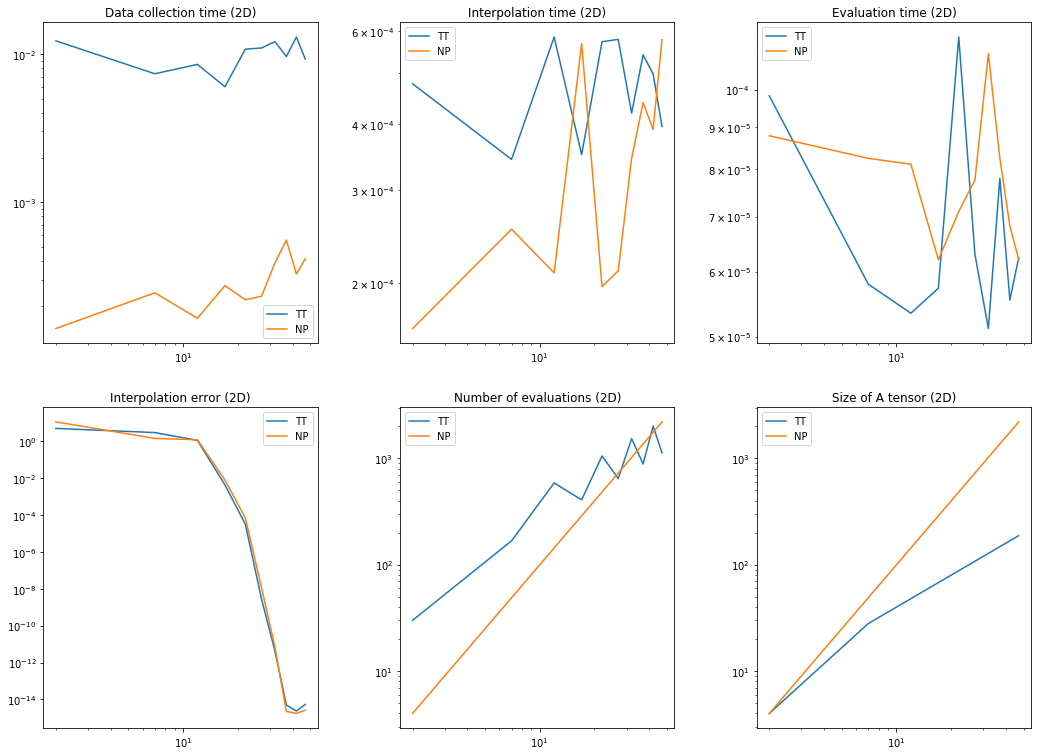

In [28]:
N_tt = np.arange(2, 50, 5)
N_np = np.arange(2, 50, 5)
int_check(N_tt, N_np, d, l, func)

---

#### Interpolation of 3D function by Chebyshev polynomials

Let consider 3D function of the form
$$
f(x) = 2 \sin{\left( \pi x_1 \right)} + e^{-x_2} + \frac{x_3}{2}.
$$

In [29]:
def func(x):
    return 2. * np.sin(np.pi * x[0, ]) + np.exp(-x[1, ]) + x[2, ] / 2.

d = 3
n = [20, 22, 24]
l = [[-3., 4.], [-2., 3.], [-1., 1.]]

In [30]:
IT = Intertrain(n, l, with_tt=False, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 3D, NP
Dim 1            : Poi 20  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 22  | Min -2.000 | Max 3.000  |
Dim 3            : Poi 24  | Min -1.000 | Max 1.000  |
------------------ Time
Init             : 7.08e-03 sec. 
Prep             : 2.16e-03 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 6.70e-07 sec. 
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 2.33e-02 
Error (mean)     : 7.86e-04 
Error (min)      : 2.01e-06 
------------------


In [31]:
IT = Intertrain(n, l, eps=1.E-6, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 3D, TT, eps= 1.00e-06
Dim 1            : Poi 20  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 22  | Min -2.000 | Max 3.000  |
Dim 3            : Poi 24  | Min -1.000 | Max 1.000  |
------------------ Time
Init             : 3.43e-02 sec. 
Prep             : 1.09e-03 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 2.01e-07 sec. 
------------------ Cross appr. parameters
nswp             :      200
kickrank         :        1
rf               : 2.00e+00
------------------ Cross appr. result
Func. evaluations:     3540
Cross iterations :        3
Av. tt-rank      : 7.50e+00
Cross err (rel)  : 4.40e-16
Cross err (abs)  : 1.50e-13
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 2.42e-01 
Error (mean)     : 2.78e-03 
Error (min)      : 1.22e-06 
------------------


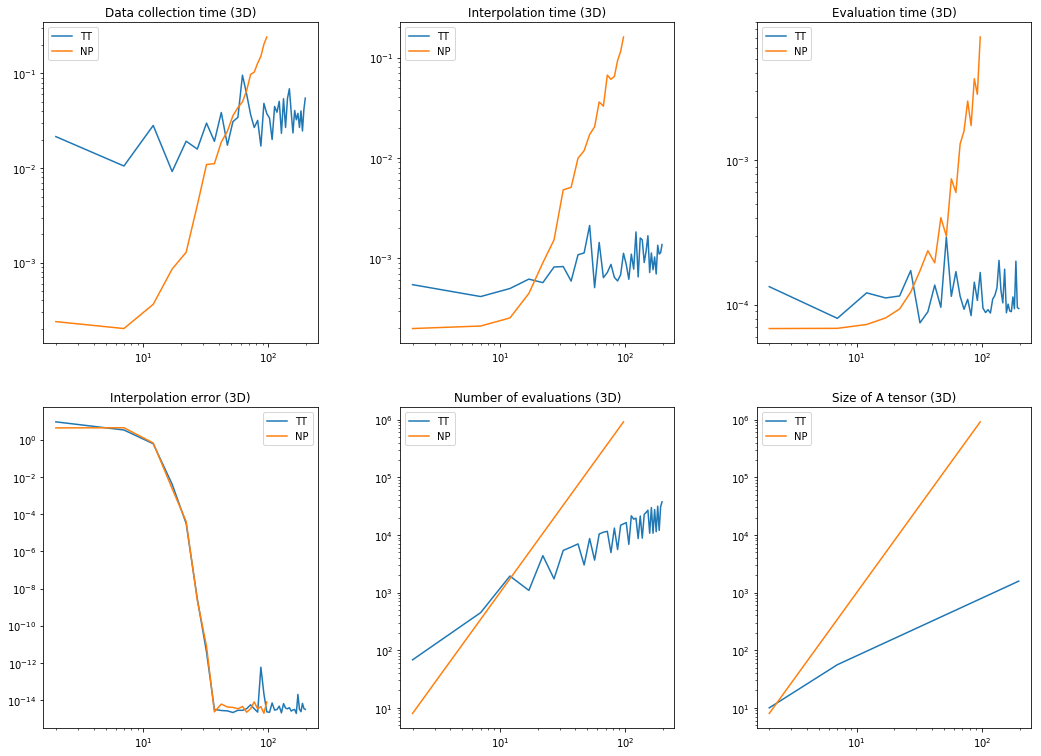

In [32]:
N_tt = np.arange(2, 200, 5)
N_np = np.arange(2, 100, 5)
int_check(N_tt, N_np, d, l, func)

---

#### Interpolation of 4D function by Chebyshev polynomials

Let consider 4D function of the form
$$
f(x) = 2 \sin{\left( \pi x_1 \right)} + e^{-x_2} + \frac{x_3}{2} \cdot x_4^2.
$$

In [33]:
def func(x):
    return 2. * np.sin(np.pi * x[0, ]) + np.exp(-x[1, ]) + x[2, ] / 2. * x[3, ]**2

d = 4
n = [30, 31, 32, 33]
l = [[-3., 4.], [-2., 3.], [-1., 1.], [-1., 3.]]

In [34]:
IT = Intertrain(n, l, with_tt=False, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 4D, NP
Dim 1            : Poi 30  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 31  | Min -2.000 | Max 3.000  |
Dim 3            : Poi 32  | Min -1.000 | Max 1.000  |
Dim 4            : Poi 33  | Min -1.000 | Max 3.000  |
------------------ Time
Init             : 3.78e-01 sec. 
Prep             : 2.14e-01 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 3.85e-07 sec. 
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 2.66e-08 
Error (mean)     : 4.13e-10 
Error (min)      : 2.22e-13 
------------------


In [35]:
IT = Intertrain(n, l, eps=1.E-6, log_path='./../tmp/tmp.txt')
IT.init(func)
IT.prep()
IT.info()

------------------ Intertain
Format           : 4D, TT, eps= 1.00e-06
Dim 1            : Poi 30  | Min -3.000 | Max 4.000  |
Dim 2            : Poi 31  | Min -2.000 | Max 3.000  |
Dim 3            : Poi 32  | Min -1.000 | Max 1.000  |
Dim 4            : Poi 33  | Min -1.000 | Max 3.000  |
------------------ Time
Init             : 1.05e-01 sec. 
Prep             : 1.23e-03 sec. 
Calc (average)   : 0.00e+00 sec. 
Func (average)   : 2.19e-07 sec. 
------------------ Cross appr. parameters
nswp             :      200
kickrank         :        1
rf               : 2.00e+00
------------------ Cross appr. result
Func. evaluations:     8760
Cross iterations :        3
Av. tt-rank      : 7.30e+00
Cross err (rel)  : 6.40e-16
Cross err (abs)  : 2.30e-12
------------------ Test for uniform random points)
Number of points : 100
Error (max)      : 1.39e-09 
Error (mean)     : 1.10e-10 
Error (min)      : 3.79e-13 
------------------


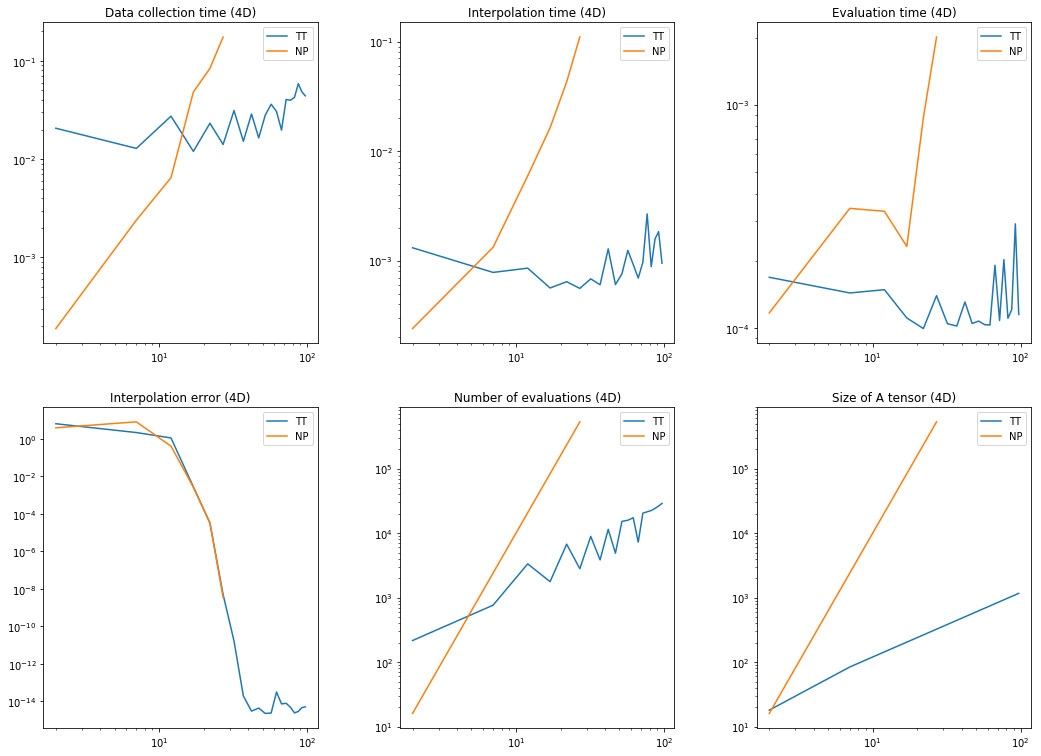

In [37]:
N_tt = np.arange(2, 100, 5)
N_np = np.arange(2, 30, 5)
int_check(N_tt, N_np, d, l, func)

---
---

